In [3]:
import numpy as np
# from data_loader import LIBS_Toolkit
from LIBS_handler import LIBS_Toolkit
import matplotlib.pyplot as plt

%load_ext autoreload

In [28]:
%autoreload 1
%autoreload 2

# 1. Initialize Class

In [5]:
fname = r"E:/Data/Data_LIBS/ForHolo/wrench_map"

In [6]:
libs_mainupulator = LIBS_Toolkit(fname, overwrite = True)

## 1.1 Load the Dataset

In [7]:
libs_mainupulator.load_dataset(baseline_corrected = False)

## 1.2 Perform basic preprocessing

 -> Baseline Removal 
 
 -> Normalize to Sum

In [8]:
_ = libs_mainupulator.baseline_correct()
_ = libs_mainupulator.normalize_to_sum()

## 1.3 Basic Visualization of Single Emission line along with average Spectrum

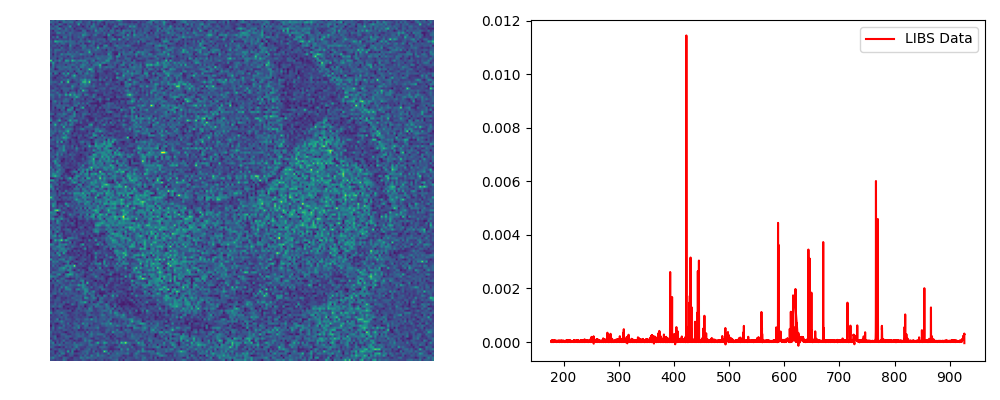

In [9]:
%matplotlib widget
libs_mainupulator.basic_analysis(345.33)

# 2. Feature Extraction

## 2.1 Perform automatic feature extraction using the FFT Algorithm

In [10]:
fft_metric = libs_mainupulator.automatic_feature_extraction(n_features = 40, sigma = 1)

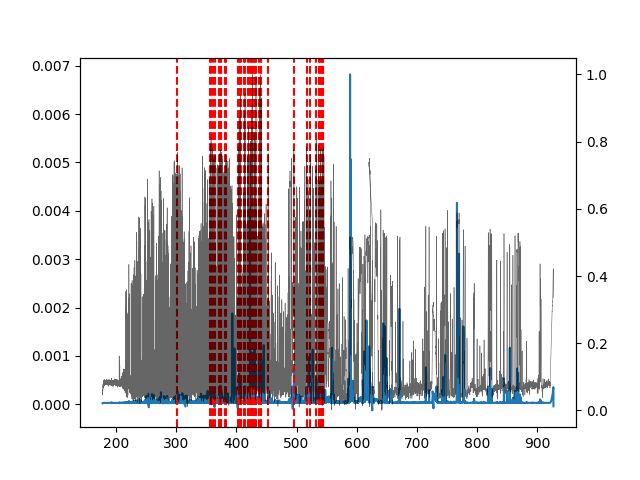

In [11]:
fig, ax = plt.subplots()
ax.plot(libs_mainupulator.wavelengths, np.mean(libs_mainupulator.dataset, axis = (0,1)))
_ = [ax.axvline(libs_mainupulator.x_features[i], color = 'r', ls = '--') for i in range(len(libs_mainupulator.x_features))]

ax1 = ax.twinx()
ax1.plot(libs_mainupulator.wavelengths, fft_metric, color = 'k', alpha = 0.6, lw = 0.4)

## 2.2 Visualize all the extracted features along with respective wavelengths

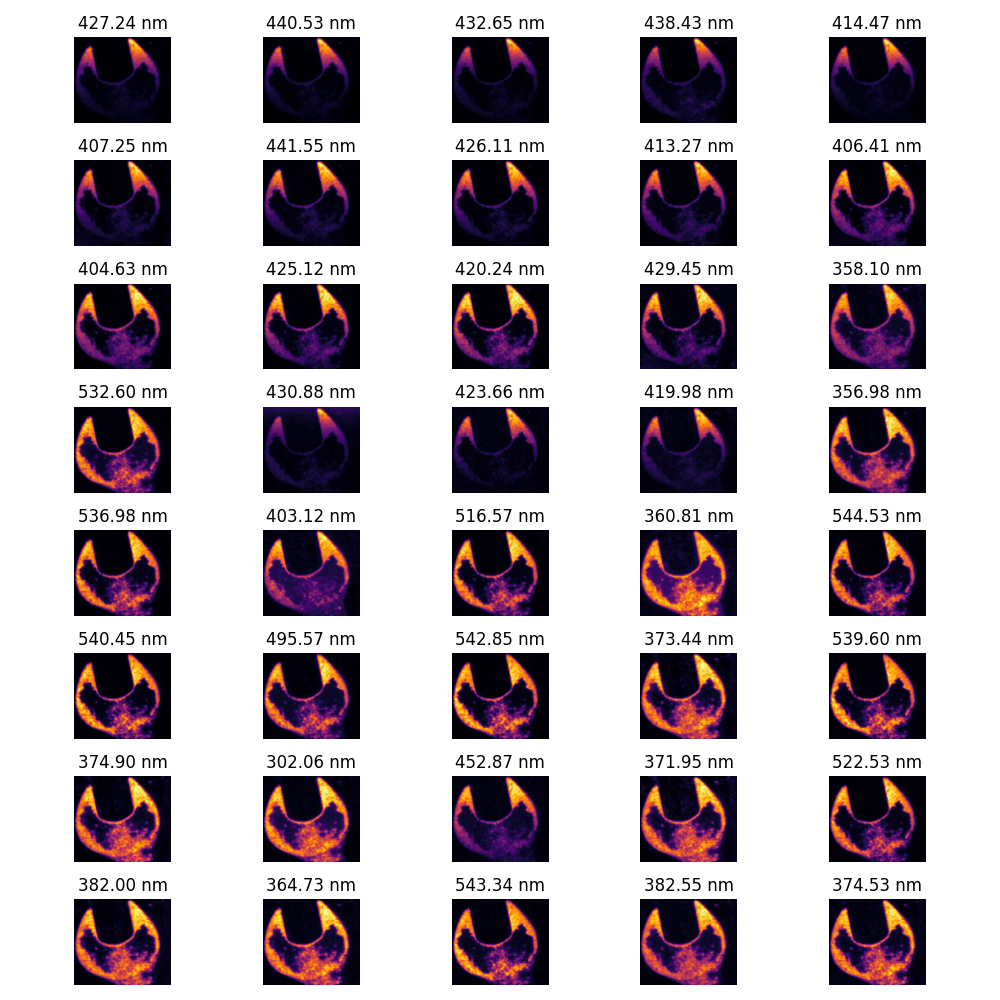

In [12]:
fig, axs = plt.subplots(8, 5, figsize = (10, 10))
axs = axs.flatten()
for i in range(libs_mainupulator.features.shape[0]):
    ax = axs[i]
    ax.imshow(libs_mainupulator.features[i], cmap = 'inferno')
    ax.set_title(f"{libs_mainupulator.x_features[i]:.2f} nm")
    ax.axis('off')
fig.tight_layout()

## 2.3 Identify the extracted features

In [34]:
identified_elements = libs_mainupulator.identify_elements(wavelength_tolerance = 0.1)

probabilities = libs_mainupulator.calculate_element_probabilities(identified_elements)
libs_mainupulator.print_element_probabilities(probabilities)

Element Probabilities:
Fe: 81.12%
V: 8.62%
Co: 6.87%
Mn: 1.97%
Ti: 1.31%
Cr: 0.12%


# 3. Classification

## 3.1 Perform k-means clustering

In [13]:
labelled = libs_mainupulator.perform_kmeans_clustering(random_state = 2, n_clusters = 4)

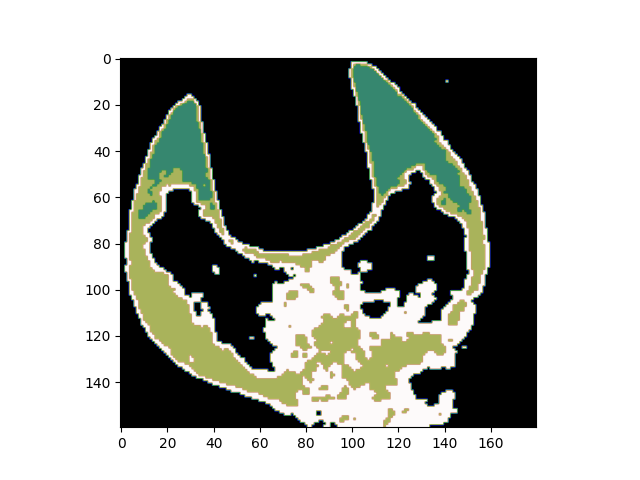

In [14]:
plt.figure()
plt.imshow(labelled, cmap = 'gist_earth')

# ToDo: Map of the relative intensity of each detected element in each cluster

## Extra Load single wavelength (takes too long)

In [ ]:
im = libs_mainupulator.load_single_wavelength(345.32, plot = False)